In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
df=pd.read_csv('train.csv')

In [3]:
dev_df=df[:1000]
train_df=df[1000:]


In [4]:
x_dev=dev_df.drop('label',axis=1).values.T/255.0
x_train=train_df.drop('label',axis=1).values.T/255.0
y_dev=dev_df['label'].values.reshape(len(dev_df),1)
y_train=train_df['label'].values.reshape(len(train_df),1)


In [5]:
def init_params():
    w1=np.random.rand(120,784)-0.5
    w2=np.random.rand(45,120)-0.5
    w3=np.random.rand(10,45)-0.5

    b1=np.random.rand(120,1)-0.5
    b2=np.random.rand(45,1)-0.5
    b3=np.random.rand(10,1)-0.5

    return w1,w2,w3,b1,b2,b3


In [6]:
def ReLU(x):
    return np.maximum(x,0)

In [7]:
def Softmax(y):
    return np.exp(y) / sum(np.exp(y))

In [8]:
def forward_propagation(x,w1,w2,w3,b1,b2,b3):
    z1=np.matmul(w1,x)+b1
    a1=ReLU(z1)
    z2=np.matmul(w2,a1)+b2
    a2=ReLU(z2)
    z3=np.matmul(w3,a2)+b3
    a3=Softmax(z3)
    return z1,a1,z2,a2,z3,a3

In [9]:
def one_hot(y):
    h=np.zeros((10,len(y)))
    i=np.arange(len(y))
    h[y,i]=1
    return h

In [10]:
def prime(z):
    return z>0

In [23]:
def backward_propagation(z1,z2,a1,a2,a3,w1,w2,w3,b1,b2,b3,x,y):
    dz3=a3-one_hot(y.reshape(41000,))
    dw3=np.matmul(dz3,a2.T)/(len(x.T))
    db3=np.sum(dz3,axis=1,keepdims=True)/(len(x.T))
    da2=np.matmul(w3.T,dz3)
    dz2=da2*prime(z2)
    dw2=np.matmul(dz2,a1.T)/(len(x.T))
    db2=np.sum(dz2,axis=1,keepdims=True)/(len(x.T))
    da1=np.matmul(w2.T,dz2)
    dz1=da1*prime(z1)
    dw1=np.matmul(dz1,x.T)/(len(x.T))
    db1=np.sum(dz1,axis=1,keepdims=True)/(len(x.T)) 
    return dw1,db1,dw2,db2,dw3,db3

In [12]:
def update_params(dw1,db1,dw2,db2,dw3,db3,w1,w2,w3,b1,b2,b3,alpha):
    w1-=alpha*dw1
    w2-=alpha*dw2
    w3-=alpha*dw3
    b1-=alpha*db1
    b2-=alpha*db2
    b3-=alpha*db3
    return w1,w2,w3,b1,b2,b3

In [13]:
def get_prediction(a3):
    return (np.argmax(a3,axis=0)).T

In [14]:
def get_accuracy(p,y):
    p=p.reshape(len(y),1)
    return np.sum(p == y)/y.shape[0]

In [15]:
def gradient_descent(x_train,y_train,alpha):
    w1,w2,w3,b1,b2,b3=init_params()
    for i in tqdm(range(1000),desc='Progess..'):
        z1,a1,z2,a2,z3,a3=forward_propagation(x_train,w1,w2,w3,b1,b2,b3)
        dw1,db1,dw2,db2,dw3,db3=backward_propagation( z1,z2,a1,a2,a3,w1,w2,w3,b1,b2,b3,x_train,y_train)
        w1,w2,w3,b1,b2,b3=update_params(dw1,db1,dw2,db2,dw3,db3,w1,w2,w3,b1,b2,b3,alpha)
        if(i%10==0):
            p=get_prediction(a3)
            accuracy=get_accuracy(p,y_train)
            print(f"Iteration {i+1}")
            print(f"Accuracy : {accuracy}")
            print(f"Pediction : {p}")

    return w1,b1,w2,b2,w3,b3

In [24]:
w1,b1,w2,b2,w3,b3=gradient_descent(x_train,y_train,0.1)


Progess..:   0%|          | 1/1000 [00:00<04:52,  3.41it/s]

Iteration 1
Accuracy : 0.08695121951219512
Pediction : [6 3 2 ... 6 2 2]


Progess..:   1%|          | 11/1000 [00:03<04:39,  3.54it/s]

Iteration 11
Accuracy : 0.49885365853658536
Pediction : [1 3 2 ... 7 6 2]


Progess..:   2%|▏         | 21/1000 [00:05<04:27,  3.66it/s]

Iteration 21
Accuracy : 0.61
Pediction : [1 3 1 ... 7 6 9]


Progess..:   3%|▎         | 31/1000 [00:08<04:35,  3.52it/s]

Iteration 31
Accuracy : 0.6699512195121952
Pediction : [1 3 1 ... 7 6 9]


Progess..:   4%|▍         | 41/1000 [00:11<04:25,  3.61it/s]

Iteration 41
Accuracy : 0.7071463414634146
Pediction : [1 3 1 ... 7 6 9]


Progess..:   5%|▌         | 51/1000 [00:14<04:26,  3.56it/s]

Iteration 51
Accuracy : 0.7348780487804878
Pediction : [1 3 1 ... 7 6 9]


Progess..:   6%|▌         | 61/1000 [00:17<04:19,  3.62it/s]

Iteration 61
Accuracy : 0.756
Pediction : [1 3 1 ... 7 6 9]


Progess..:   7%|▋         | 71/1000 [00:19<04:12,  3.68it/s]

Iteration 71
Accuracy : 0.7740487804878049
Pediction : [1 0 1 ... 7 6 9]


Progess..:   8%|▊         | 81/1000 [00:22<04:17,  3.57it/s]

Iteration 81
Accuracy : 0.7883414634146342
Pediction : [1 0 1 ... 7 6 9]


Progess..:   9%|▉         | 91/1000 [00:25<04:50,  3.13it/s]

Iteration 91
Accuracy : 0.7999756097560976
Pediction : [1 5 1 ... 7 6 9]


Progess..:  10%|█         | 101/1000 [00:28<04:07,  3.63it/s]

Iteration 101
Accuracy : 0.8106585365853659
Pediction : [1 5 1 ... 7 6 9]


Progess..:  11%|█         | 111/1000 [00:31<04:07,  3.60it/s]

Iteration 111
Accuracy : 0.8189268292682926
Pediction : [1 5 1 ... 7 6 9]


Progess..:  12%|█▏        | 121/1000 [00:34<04:27,  3.29it/s]

Iteration 121
Accuracy : 0.8265365853658536
Pediction : [1 5 1 ... 7 6 9]


Progess..:  13%|█▎        | 131/1000 [00:37<04:53,  2.96it/s]

Iteration 131
Accuracy : 0.8336341463414634
Pediction : [1 5 1 ... 7 6 9]


Progess..:  14%|█▍        | 141/1000 [00:41<05:05,  2.81it/s]

Iteration 141
Accuracy : 0.8387560975609756
Pediction : [1 5 1 ... 7 6 9]


Progess..:  15%|█▌        | 151/1000 [00:44<05:22,  2.63it/s]

Iteration 151
Accuracy : 0.8441463414634146
Pediction : [1 5 1 ... 7 6 9]


Progess..:  16%|█▌        | 161/1000 [00:47<03:56,  3.55it/s]

Iteration 161
Accuracy : 0.8487317073170731
Pediction : [1 5 1 ... 7 6 9]


Progess..:  17%|█▋        | 171/1000 [00:50<04:08,  3.34it/s]

Iteration 171
Accuracy : 0.8525121951219512
Pediction : [1 5 1 ... 7 6 9]


Progess..:  18%|█▊        | 181/1000 [00:53<03:41,  3.70it/s]

Iteration 181
Accuracy : 0.8559512195121951
Pediction : [1 5 1 ... 7 6 9]


Progess..:  19%|█▉        | 191/1000 [00:57<04:37,  2.92it/s]

Iteration 191
Accuracy : 0.8596585365853658
Pediction : [1 5 1 ... 7 6 9]


Progess..:  20%|██        | 201/1000 [01:00<04:41,  2.84it/s]

Iteration 201
Accuracy : 0.8628048780487805
Pediction : [1 5 1 ... 7 6 9]


Progess..:  21%|██        | 211/1000 [01:03<03:40,  3.58it/s]

Iteration 211
Accuracy : 0.8659512195121951
Pediction : [1 5 1 ... 7 6 9]


Progess..:  22%|██▏       | 221/1000 [01:06<03:40,  3.53it/s]

Iteration 221
Accuracy : 0.8686341463414634
Pediction : [1 5 1 ... 7 6 9]


Progess..:  23%|██▎       | 231/1000 [01:09<03:36,  3.55it/s]

Iteration 231
Accuracy : 0.8711219512195122
Pediction : [1 5 1 ... 7 6 9]


Progess..:  24%|██▍       | 241/1000 [01:12<03:39,  3.45it/s]

Iteration 241
Accuracy : 0.8735853658536585
Pediction : [1 5 1 ... 7 6 9]


Progess..:  25%|██▌       | 251/1000 [01:15<03:43,  3.36it/s]

Iteration 251
Accuracy : 0.8760243902439024
Pediction : [1 5 1 ... 7 6 9]


Progess..:  26%|██▌       | 261/1000 [01:18<04:40,  2.64it/s]

Iteration 261
Accuracy : 0.878219512195122
Pediction : [1 5 1 ... 7 6 9]


Progess..:  27%|██▋       | 271/1000 [01:22<04:33,  2.67it/s]

Iteration 271
Accuracy : 0.8802439024390244
Pediction : [1 5 1 ... 7 6 9]


Progess..:  28%|██▊       | 281/1000 [01:25<03:31,  3.40it/s]

Iteration 281
Accuracy : 0.8824634146341463
Pediction : [1 5 1 ... 7 6 9]


Progess..:  29%|██▉       | 291/1000 [01:28<03:43,  3.18it/s]

Iteration 291
Accuracy : 0.8841951219512195
Pediction : [1 5 1 ... 7 6 9]


Progess..:  30%|███       | 301/1000 [01:32<04:12,  2.77it/s]

Iteration 301
Accuracy : 0.8857560975609756
Pediction : [1 5 1 ... 7 6 9]


Progess..:  31%|███       | 311/1000 [01:35<03:26,  3.34it/s]

Iteration 311
Accuracy : 0.8872682926829268
Pediction : [1 5 1 ... 7 6 9]


Progess..:  32%|███▏      | 321/1000 [01:38<03:21,  3.37it/s]

Iteration 321
Accuracy : 0.8890243902439025
Pediction : [1 5 1 ... 7 6 9]


Progess..:  33%|███▎      | 331/1000 [01:41<03:22,  3.30it/s]

Iteration 331
Accuracy : 0.8903170731707317
Pediction : [1 5 1 ... 7 6 9]


Progess..:  34%|███▍      | 341/1000 [01:44<03:02,  3.61it/s]

Iteration 341
Accuracy : 0.8917317073170732
Pediction : [1 5 1 ... 7 6 9]


Progess..:  35%|███▌      | 351/1000 [01:47<03:56,  2.75it/s]

Iteration 351
Accuracy : 0.893
Pediction : [1 5 1 ... 7 6 9]


Progess..:  36%|███▌      | 361/1000 [01:51<03:23,  3.14it/s]

Iteration 361
Accuracy : 0.894219512195122
Pediction : [1 5 1 ... 7 6 9]


Progess..:  37%|███▋      | 371/1000 [01:53<03:02,  3.45it/s]

Iteration 371
Accuracy : 0.8954146341463415
Pediction : [1 5 1 ... 7 6 9]


Progess..:  38%|███▊      | 381/1000 [01:57<03:05,  3.33it/s]

Iteration 381
Accuracy : 0.8973414634146342
Pediction : [1 5 1 ... 7 6 9]


Progess..:  39%|███▉      | 391/1000 [02:00<03:36,  2.81it/s]

Iteration 391
Accuracy : 0.8987804878048781
Pediction : [1 5 1 ... 7 6 9]


Progess..:  40%|████      | 401/1000 [02:04<03:05,  3.22it/s]

Iteration 401
Accuracy : 0.8999024390243903
Pediction : [1 5 1 ... 7 6 9]


Progess..:  41%|████      | 411/1000 [02:07<03:09,  3.11it/s]

Iteration 411
Accuracy : 0.9009268292682927
Pediction : [1 5 1 ... 7 6 9]


Progess..:  42%|████▏     | 421/1000 [02:10<02:50,  3.39it/s]

Iteration 421
Accuracy : 0.9018536585365854
Pediction : [1 5 1 ... 7 6 9]


Progess..:  43%|████▎     | 431/1000 [02:13<02:49,  3.36it/s]

Iteration 431
Accuracy : 0.9028536585365854
Pediction : [1 5 1 ... 7 6 9]


Progess..:  44%|████▍     | 441/1000 [02:16<03:32,  2.63it/s]

Iteration 441
Accuracy : 0.9039268292682927
Pediction : [1 5 1 ... 7 6 9]


Progess..:  45%|████▌     | 451/1000 [02:19<02:38,  3.47it/s]

Iteration 451
Accuracy : 0.905
Pediction : [1 5 1 ... 7 6 9]


Progess..:  46%|████▌     | 461/1000 [02:22<02:49,  3.17it/s]

Iteration 461
Accuracy : 0.9058536585365854
Pediction : [1 5 1 ... 7 6 9]


Progess..:  47%|████▋     | 471/1000 [02:25<02:37,  3.36it/s]

Iteration 471
Accuracy : 0.9069268292682927
Pediction : [1 5 1 ... 7 6 9]


Progess..:  48%|████▊     | 481/1000 [02:28<02:25,  3.57it/s]

Iteration 481
Accuracy : 0.9080243902439025
Pediction : [1 5 1 ... 7 6 9]


Progess..:  49%|████▉     | 491/1000 [02:31<02:29,  3.39it/s]

Iteration 491
Accuracy : 0.9086829268292683
Pediction : [1 5 1 ... 7 6 9]


Progess..:  50%|█████     | 501/1000 [02:34<02:30,  3.31it/s]

Iteration 501
Accuracy : 0.9097073170731708
Pediction : [1 5 1 ... 7 6 9]


Progess..:  51%|█████     | 511/1000 [02:37<02:18,  3.53it/s]

Iteration 511
Accuracy : 0.9105365853658537
Pediction : [1 5 1 ... 7 6 9]


Progess..:  52%|█████▏    | 521/1000 [02:40<02:25,  3.29it/s]

Iteration 521
Accuracy : 0.911219512195122
Pediction : [1 5 1 ... 7 6 9]


Progess..:  53%|█████▎    | 531/1000 [02:44<03:04,  2.54it/s]

Iteration 531
Accuracy : 0.9120487804878049
Pediction : [1 5 1 ... 7 6 9]


Progess..:  54%|█████▍    | 541/1000 [02:48<02:52,  2.66it/s]

Iteration 541
Accuracy : 0.9129756097560976
Pediction : [1 5 1 ... 7 6 9]


Progess..:  55%|█████▌    | 551/1000 [02:51<02:47,  2.68it/s]

Iteration 551
Accuracy : 0.9134390243902439
Pediction : [1 5 1 ... 7 6 9]


Progess..:  56%|█████▌    | 561/1000 [02:55<02:09,  3.39it/s]

Iteration 561
Accuracy : 0.9140731707317074
Pediction : [1 5 1 ... 7 6 9]


Progess..:  57%|█████▋    | 571/1000 [02:58<02:14,  3.19it/s]

Iteration 571
Accuracy : 0.9146341463414634
Pediction : [1 5 1 ... 7 6 9]


Progess..:  58%|█████▊    | 581/1000 [03:01<02:02,  3.41it/s]

Iteration 581
Accuracy : 0.9154634146341464
Pediction : [1 5 1 ... 7 6 9]


Progess..:  59%|█████▉    | 591/1000 [03:04<02:00,  3.39it/s]

Iteration 591
Accuracy : 0.9162926829268293
Pediction : [1 5 1 ... 7 6 9]


Progess..:  60%|██████    | 601/1000 [03:07<02:13,  2.99it/s]

Iteration 601
Accuracy : 0.9169512195121952
Pediction : [1 5 1 ... 7 6 9]


Progess..:  61%|██████    | 611/1000 [03:10<01:52,  3.46it/s]

Iteration 611
Accuracy : 0.9175853658536586
Pediction : [1 5 1 ... 7 6 9]


Progess..:  62%|██████▏   | 621/1000 [03:14<02:36,  2.43it/s]

Iteration 621
Accuracy : 0.918
Pediction : [1 5 1 ... 7 6 9]


Progess..:  63%|██████▎   | 631/1000 [03:18<02:02,  3.01it/s]

Iteration 631
Accuracy : 0.9187560975609756
Pediction : [1 5 1 ... 7 6 9]


Progess..:  64%|██████▍   | 641/1000 [03:21<01:52,  3.20it/s]

Iteration 641
Accuracy : 0.9193658536585366
Pediction : [1 5 1 ... 7 6 9]


Progess..:  65%|██████▌   | 651/1000 [03:24<01:46,  3.27it/s]

Iteration 651
Accuracy : 0.9200975609756098
Pediction : [1 5 1 ... 7 6 9]


Progess..:  66%|██████▌   | 661/1000 [03:27<01:41,  3.34it/s]

Iteration 661
Accuracy : 0.9206585365853659
Pediction : [1 5 1 ... 7 6 9]


Progess..:  67%|██████▋   | 671/1000 [03:29<01:30,  3.64it/s]

Iteration 671
Accuracy : 0.9211219512195122
Pediction : [1 5 1 ... 7 6 9]


Progess..:  68%|██████▊   | 681/1000 [03:32<01:37,  3.28it/s]

Iteration 681
Accuracy : 0.9216585365853659
Pediction : [1 5 1 ... 7 6 9]


Progess..:  69%|██████▉   | 691/1000 [03:36<01:50,  2.79it/s]

Iteration 691
Accuracy : 0.9221951219512196
Pediction : [1 5 1 ... 7 6 9]


Progess..:  70%|███████   | 701/1000 [03:40<01:38,  3.02it/s]

Iteration 701
Accuracy : 0.9228780487804878
Pediction : [1 5 1 ... 7 6 9]


Progess..:  71%|███████   | 711/1000 [03:43<01:33,  3.08it/s]

Iteration 711
Accuracy : 0.9233414634146342
Pediction : [1 5 1 ... 7 6 9]


Progess..:  72%|███████▏  | 721/1000 [03:46<01:21,  3.41it/s]

Iteration 721
Accuracy : 0.9236341463414635
Pediction : [1 5 1 ... 7 6 9]


Progess..:  73%|███████▎  | 731/1000 [03:49<01:18,  3.44it/s]

Iteration 731
Accuracy : 0.9241219512195122
Pediction : [1 5 1 ... 7 6 9]


Progess..:  74%|███████▍  | 741/1000 [03:52<01:17,  3.34it/s]

Iteration 741
Accuracy : 0.9244878048780488
Pediction : [1 5 1 ... 7 6 9]


Progess..:  75%|███████▌  | 751/1000 [03:55<01:12,  3.42it/s]

Iteration 751
Accuracy : 0.9251707317073171
Pediction : [1 5 1 ... 7 6 9]


Progess..:  76%|███████▌  | 761/1000 [03:58<01:16,  3.14it/s]

Iteration 761
Accuracy : 0.9257560975609757
Pediction : [1 5 1 ... 7 6 9]


Progess..:  77%|███████▋  | 771/1000 [04:02<01:18,  2.93it/s]

Iteration 771
Accuracy : 0.9264878048780488
Pediction : [1 5 1 ... 7 6 9]


Progess..:  78%|███████▊  | 781/1000 [04:05<01:08,  3.21it/s]

Iteration 781
Accuracy : 0.9270243902439025
Pediction : [1 5 1 ... 7 6 9]


Progess..:  79%|███████▉  | 791/1000 [04:08<01:16,  2.74it/s]

Iteration 791
Accuracy : 0.927439024390244
Pediction : [1 5 1 ... 7 6 9]


Progess..:  80%|████████  | 801/1000 [04:11<01:09,  2.85it/s]

Iteration 801
Accuracy : 0.9281219512195122
Pediction : [1 5 1 ... 7 6 9]


Progess..:  81%|████████  | 811/1000 [04:15<01:05,  2.87it/s]

Iteration 811
Accuracy : 0.9287560975609757
Pediction : [1 5 1 ... 7 6 9]


Progess..:  82%|████████▏ | 821/1000 [04:18<01:01,  2.91it/s]

Iteration 821
Accuracy : 0.9291707317073171
Pediction : [1 5 1 ... 7 6 9]


Progess..:  83%|████████▎ | 831/1000 [04:22<00:58,  2.91it/s]

Iteration 831
Accuracy : 0.9295365853658537
Pediction : [1 5 1 ... 7 6 9]


Progess..:  84%|████████▍ | 841/1000 [04:25<00:56,  2.81it/s]

Iteration 841
Accuracy : 0.9299512195121952
Pediction : [1 5 1 ... 7 6 9]


Progess..:  85%|████████▌ | 851/1000 [04:28<00:41,  3.61it/s]

Iteration 851
Accuracy : 0.9302926829268293
Pediction : [1 5 1 ... 7 6 9]


Progess..:  86%|████████▌ | 861/1000 [04:31<00:41,  3.32it/s]

Iteration 861
Accuracy : 0.9307804878048781
Pediction : [1 5 1 ... 7 6 9]


Progess..:  87%|████████▋ | 871/1000 [04:34<00:36,  3.55it/s]

Iteration 871
Accuracy : 0.9310975609756098
Pediction : [1 5 1 ... 7 6 9]


Progess..:  88%|████████▊ | 881/1000 [04:37<00:32,  3.63it/s]

Iteration 881
Accuracy : 0.9313902439024391
Pediction : [1 5 1 ... 7 6 9]


Progess..:  89%|████████▉ | 891/1000 [04:40<00:30,  3.55it/s]

Iteration 891
Accuracy : 0.9318048780487805
Pediction : [1 5 1 ... 7 6 9]


Progess..:  90%|█████████ | 901/1000 [04:43<00:27,  3.57it/s]

Iteration 901
Accuracy : 0.9321951219512196
Pediction : [1 5 1 ... 7 6 9]


Progess..:  91%|█████████ | 911/1000 [04:46<00:25,  3.45it/s]

Iteration 911
Accuracy : 0.9325853658536586
Pediction : [1 5 1 ... 7 6 9]


Progess..:  92%|█████████▏| 921/1000 [04:49<00:23,  3.34it/s]

Iteration 921
Accuracy : 0.9329756097560976
Pediction : [1 5 1 ... 7 6 9]


Progess..:  93%|█████████▎| 931/1000 [04:52<00:18,  3.71it/s]

Iteration 931
Accuracy : 0.9332926829268293
Pediction : [1 5 1 ... 7 6 9]


Progess..:  94%|█████████▍| 941/1000 [04:55<00:16,  3.57it/s]

Iteration 941
Accuracy : 0.9336829268292683
Pediction : [1 5 1 ... 7 6 9]


Progess..:  95%|█████████▌| 951/1000 [04:57<00:13,  3.62it/s]

Iteration 951
Accuracy : 0.934
Pediction : [1 5 1 ... 7 6 9]


Progess..:  96%|█████████▌| 961/1000 [05:00<00:10,  3.69it/s]

Iteration 961
Accuracy : 0.9342926829268293
Pediction : [1 5 1 ... 7 6 9]


Progess..:  97%|█████████▋| 971/1000 [05:03<00:09,  3.05it/s]

Iteration 971
Accuracy : 0.9344878048780488
Pediction : [1 5 1 ... 7 6 9]


Progess..:  98%|█████████▊| 981/1000 [05:06<00:05,  3.40it/s]

Iteration 981
Accuracy : 0.9348536585365854
Pediction : [1 5 1 ... 7 6 9]


Progess..:  99%|█████████▉| 991/1000 [05:09<00:02,  3.57it/s]

Iteration 991
Accuracy : 0.9351951219512196
Pediction : [1 5 1 ... 7 6 9]


Progess..: 100%|██████████| 1000/1000 [05:12<00:00,  3.20it/s]


In [26]:
def make_predictions(x,w1,b1,w2,b2,w3,b3):
     *_,a3=forward_propagation(x,w1,w2,w3,b1,b2,b3)
     return get_prediction(a3)

In [27]:
def test_prediction(index,w1,b1,w2,b2,w3,b3):
    x=(df.drop('label',axis=1).values[index].T/255.0).reshape(784,1)
    y=(df['label'].values[index].reshape(1,1))
    *_,a3=forward_propagation(x,w1,w2,w3,b1,b2,b3)
    tp= get_prediction(a3)
    print(f"Prediction : {tp[0]}")
    print(f"Label : {y[0][0]}")

    image=x.reshape((28,28))*255.0
    plt.gray()
    plt.imshow(image)
    plt.show()

Prediction : 6
Label : 6


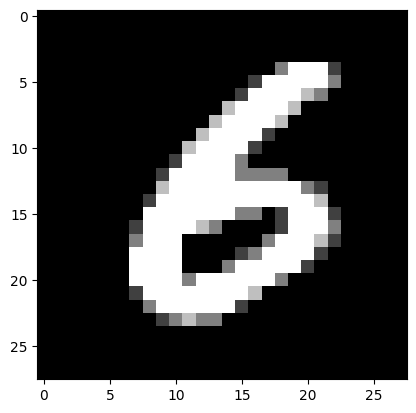

In [28]:
pred=make_predictions(x_dev,w1,b1,w2,b2,w3,b3)
index=int(input("Enter an index : "))
test_prediction(index,w1,b1,w2,b2,w3,b3)

In [30]:
dev_predictions = make_predictions(x_dev, w1,b1,w2,b2,w3,b3)
get_accuracy(dev_predictions, y_dev)

0.924